In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_mentah = pd.read_csv(('https://drive.google.com/uc?export=download&id=16vCHm5jzo_KAf7KXdTb1t48KaqO286Gm'), encoding = 'Latin-1')
df_mentah.info() #Untuk mengecek tipe data, kolom yang tidak sesuai format, data Null, jumlah baris & kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

1. Melakukan cleansheet terlebih dahulu. Karena **ada beberapa kolom yang tidak sesuai format** seperti Invoice ID, Customer type, Product line, Unit price, Tax 5%, gross margin percentage, gross income. Di mana seharusnya kolom-kolom tersebut tidak menggunakan spasi untuk memisahkan setiap kata. Karena itu spasi diganti menjadi _

In [ ]:
df = df_mentah.rename(columns={"Invoice ID": "invoice_id", "Customer type": "customer_type", "Product line": "product_line", "Unit price": "unit_price", "Tax 5%": "tax_5_percent", "gross margin percentage": "gross_margin_percentage", "gross income": "gross_income"})

df.head(3)

,invoice_id,Branch,City,customer_type,Gender,product_line,unit_price,Quantity,tax_5_percent,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


2. Menemukan branch dengan rating tertinggi dan product line dengan gross income tertinggi

In [ ]:
#2a. Menemukan branch dengan rating tertinggi
#Menyortir kolom Branch dan rating terlebih dahulu

rating_cabang = df[['City', 'Branch', 'Rating']]
rating_cabang.sort_values('Rating', ascending=False)

,City,Branch,Rating
387,Yangon,A,10.0
159,Mandalay,B,10.0
853,Mandalay,B,10.0
62,Mandalay,B,10.0
60,Naypyitaw,C,10.0
...,...,...,...
379,Mandalay,B,4.0
848,Naypyitaw,C,4.0
643,Naypyitaw,C,4.0
328,Mandalay,B,4.0


In [ ]:
#Mencari cabang mana saja yang memiliki rating tertinggi

rating_cabang_10 = rating_cabang[rating_cabang['Rating']==10] #Memilih cabang yang hanya memiliki rating = 10
rating_cabang_10

,City,Branch,Rating
60,Naypyitaw,C,10.0
62,Mandalay,B,10.0
159,Mandalay,B,10.0
387,Yangon,A,10.0
853,Mandalay,B,10.0


In [ ]:
#2b. Mencari product line dengan gross income tertinggi
#Menyortir manakah product line yang memiliki gross income tertinggi

product_gross = df[['product_line', 'gross_income']] #Memilih kolom product line & gross income
product_group = product_gross.groupby('product_line').sum() #Mengelompokkan dan mengakumulasi setiap product line
product_group.sort_values('gross_income', ascending=False) #Mengurutkan product line kumulatif yang memiliki gross income tertinggi

,gross_income
product_line,
Food and beverages,2673.5640
Sports and travel,2624.8965
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Home and lifestyle,2564.8530
Health and beauty,2342.5590


3. Membuat pie chart untuk membandingkan jumlah pembeli laki-laki dan perempuan

In [ ]:
#Menghitung jumlah masing-masing gender
jml_gender = df['Gender'].value_counts()
jml_gender

Gender
Female    501
Male      499
Name: count, dtype: int64

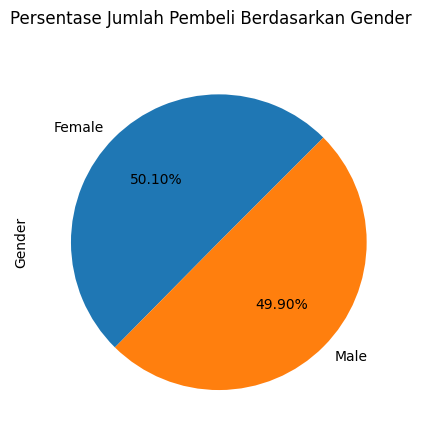

In [ ]:
#Memvisualisasikan gender yang sudah dihitung ke dalam bentuk pie chart
jml_gender.plot(kind='pie', title='Persentase Jumlah Pembeli Berdasarkan Gender', autopct='%0.2f%%', subplots=True, ylabel='Gender', startangle=45)
plt.show()

4. Menghitung revenue secara keseluruhan. Yaitu dengan mengalikan unit price dengan quantity. Lalu menambahkan kolom baru bernama revenue berdasarkan hasil perkalian kolom tersebut dan membuat bar chart revenue

In [ ]:
df['revenue'] = (df['unit_price'] * df['Quantity']) #Membuat kolom baru berdasarkan perkalian
df['revenue']

df.head(3)

,invoice_id,Branch,City,customer_type,Gender,product_line,unit_price,Quantity,tax_5_percent,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31


In [ ]:
date_revenue = df[['Date', 'revenue']]
date_revenue_sort = date_revenue.sort_values('Date')

# mengubah kolom Date ke format tanggal (karena format sebelumnya masih string/object)
date_revenue_sort['Date'] = pd.to_datetime(df['Date'])

date_revenue_sort #memastikan urutan tanggal bulan tahun sudah benar

,Date,revenue
496,2019-01-01,126.44
484,2019-01-01,369.80
567,2019-01-01,591.66
523,2019-01-01,125.74
970,2019-01-01,846.30
...,...,...
393,2019-03-09,522.60
73,2019-03-09,455.46
433,2019-03-09,668.78
585,2019-03-09,206.84


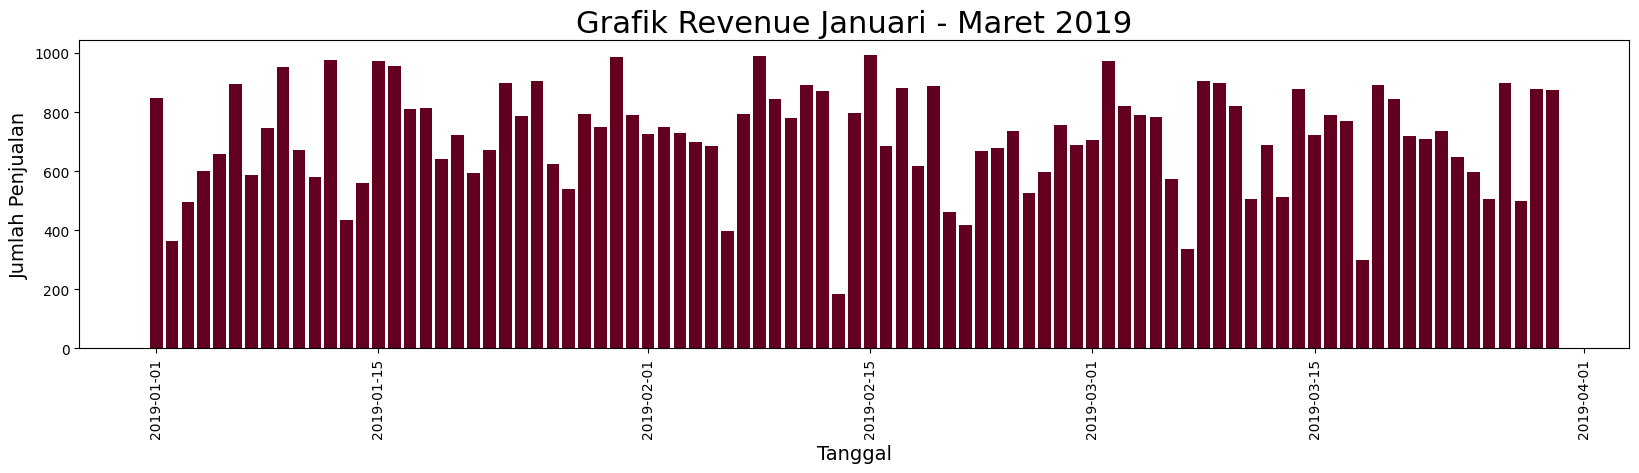

In [ ]:
#Memvisualisasikan revenue yang sudah dihitung ke dalam bentuk bar chart

plt.figure(figsize=(20,4))
plt.bar(date_revenue_sort['Date'], date_revenue_sort['revenue'], color='#63001f')
plt.title("Grafik Revenue Januari - Maret 2019", size=22)
plt.xlabel("Tanggal", size=14)
plt.ylabel("Jumlah Penjualan", size=14)
plt.xticks(label=date_revenue_sort['revenue'], rotation='vertical')
plt.show()